In [15]:
# %load Dow+Jones+Prediction.py
import pandas as pd
import os
import seaborn as sns

In [16]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [17]:
data = pd.read_csv('Downloads/dow_jones_index.data')
data.head(5)
data.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [18]:
#Data is distributed over 2 quarters
data['quarter'].unique()

array([1, 2])

In [19]:
# In[142]:
stocks = data['stock'].unique()
print("Different stock names : ",stocks)
print("Number of different stocks : ",len(stocks))
#30 Different types of stocks

('Different stock names : ', array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object))
('Number of different stocks : ', 30)


In [25]:
import datetime as dt

In [55]:
#Changing Data type of columns
data['date'] = pd.to_datetime(data['date'])
data['open'] = data['open'].apply(lambda x:float(x.replace('$','')))
data['close'] = data['close'].apply(lambda x:float(x.replace('$','')))
data['high'] = data['high'].apply(lambda x:float(x.replace('$','')))
data['low'] = data['low'].apply(lambda x:float(x.replace('$','')))
data['next_weeks_open'] = data['next_weeks_open'].apply(lambda x:float(x.replace('$','')))
data['next_weeks_close'] = data['next_weeks_close'].apply(lambda x:float(x.replace('$','')))

AttributeError: 'float' object has no attribute 'replace'

In [56]:
data.set_index('date')
#inplace is False by default

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-07,1,AA,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
2011-01-14,1,AA,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2011-01-21,1,AA,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
2011-01-28,1,AA,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
2011-02-04,1,AA,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
2011-02-11,1,AA,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
2011-02-18,1,AA,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,16.98,16.68,-1.766780,83,0.173611
2011-02-25,1,AA,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,16.81,16.58,-1.368230,76,0.179856
2011-03-04,1,AA,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,16.58,16.03,-3.317250,69,0.180941


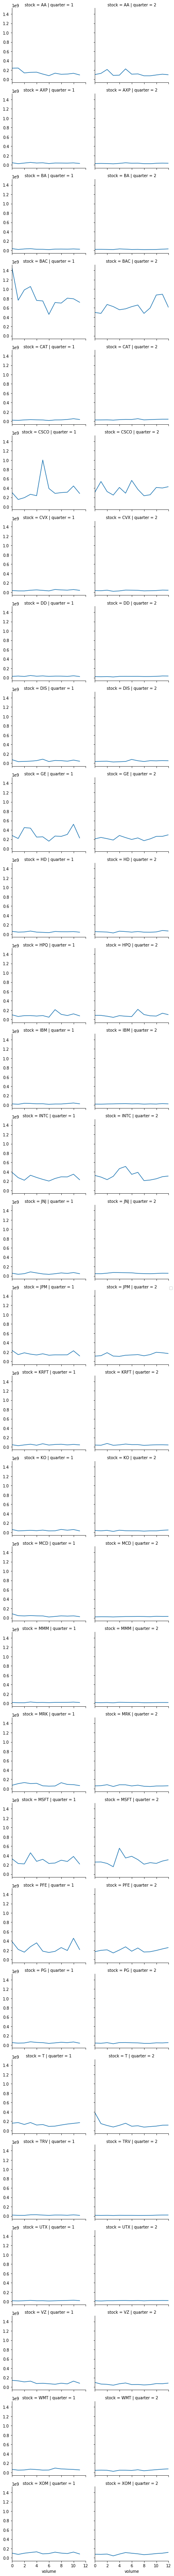

In [24]:
%matplotlib inline
get_ipython().magic('matplotlib inline')
g = sns.FacetGrid(data, row = "stock" , col="quarter")
g.map(sns.tsplot,'volume')
g.add_legend()

In [57]:
pivoted = data.pivot(index= 'date',columns = 'stock')[['open','close']]

In [58]:
#What does the Dow Jones look like now?
pivoted

open                                                            \
stock          AA    AXP     BA    BAC     CAT   CSCO     CVX     DD    DIS   
date                                                                          
2011-01-07  15.82  43.30  66.15  13.85   94.38  20.45   91.66  50.05  37.74   
2011-01-14  16.71  44.20  69.42  14.17   93.21  20.94   90.95  48.30  39.01   
2011-01-21  16.19  46.03  70.86  15.08   94.16  21.22   92.94  49.53  39.07   
2011-01-28  15.87  46.05  71.52  14.25   92.71  20.84   93.89  48.44  39.64   
2011-02-04  16.18  44.13  69.26  13.71   96.13  20.93   93.85  50.15  39.04   
2011-02-11  17.33  43.96  71.43  14.51   99.62  22.11   97.28  52.62  40.80   
2011-02-18  17.39  46.42  72.70  14.77  103.56  18.84   95.50  54.44  43.19   
2011-02-25  16.98  44.94  72.35  14.38  104.86  18.73   99.23  54.95  42.83   
2011-03-04  16.81  43.73  72.47  14.27  102.72  18.62  102.28  54.22  43.02   
2011-03-11  16.58  43.86  71.60  14.18  103.42  18.36  104.12  54.10  43.53   
2011-03-18  15.95  43.86  71.17  14.26  102.59  17.81   99.16  53.18  42.64   
2011-03-25  16.38  44.75  70.29  14.20  106.90  17.34  103.86  53.80  41.46   
2011-04-01  17.13  45.54  73.50  13.42  109.54  17.36  106.40  54.11  43.19   
2011-04-08  17.42  45.61  73.38  13.40  113.75  17.01  108.52  55.50  42.87   
2011-04-15  18.06  46.36  73.65  13.50  110.02  17.71  109.74  55.45  41.76   
2011-04-21  16.36  45.85  72.72  12.59  105.58  16.88  104.95  54.28  40.97   
2011-04-29  16.94  47.19  75.51  12.32  109.24  16.93  107.37  55.69  42.34   
2011-05-06  17.27  49.37  80.35  12.36  116.24  17.51  109.48  56.42  43.47   
2011-05-13  17.16  50.06  79.31  12.28  110.80  17.53  103.25  54.94  43.32   
2011-05-20  17.00  49.42  78.66  11.89  105.87  16.82  102.03  52.74  41.26   
2011-05-27  15.96  50.74  76.55  11.47  101.30  16.41  101.13  51.75  41.15   
2011-06-03  16.73  51.39  77.80  11.87  106.41  16.59  104.61  53.18  41.90   
2011-06-10  15.92  49.13  74.76  11.18  100.25  16.04  100.90  50.30  39.18   
2011-06-17  15.29  47.96  73.06  10.89   96.93  15.14  100.04  50.03  38.63   
2011-06-24  14.67  48.35  73.96  10.59   96.49  14.94   98.88  49.50  37.85   

                   ...    close                                            \
stock          GE  ...      MRK   MSFT    PFE     PG      T    TRV    UTX   
date               ...                                                      
2011-01-07  18.49  ...    37.35  28.60  18.34  64.50  28.85  53.33  79.08   
2011-01-14  18.61  ...    34.23  28.30  18.34  65.53  28.43  54.63  79.08   
2011-01-21  18.98  ...    33.90  28.02  18.36  65.91  28.33  55.00  80.20   
2011-01-28  19.93  ...    33.07  27.75  18.15  64.20  27.49  55.81  81.43   
2011-02-04  20.13  ...    32.89  27.77  19.30  63.61  27.97  57.41  82.52   
2011-02-11  20.77  ...    33.07  27.25  18.83  64.73  28.47  58.99  85.20   
2011-02-18  21.51  ...    32.85  27.06  19.19  64.30  28.57  60.92  85.01   
2011-02-25  20.88  ...    32.19  26.55  18.86  62.84  28.13  59.60  83.37   
2011-03-04  20.95  ...    33.06  25.95  19.66  62.03  27.92  59.18  82.86   
2011-03-11  20.40  ...    32.73  25.68  19.47  61.49  28.46  58.88  81.28   
2011-03-18  19.96  ...    31.91  24.80  20.18  60.60  27.94  58.06  80.16   
2011-03-25  19.68  ...    32.57  25.62  20.35  60.88  28.85  58.98  83.52   
2011-04-01  19.81  ...    33.07  25.48  20.38  62.08  30.62  59.71  85.32   
2011-04-08  20.73  ...    33.67  26.07  20.46  61.90  30.71  59.58  84.81   
2011-04-15  20.24  ...    34.51  25.37  20.53  64.18  30.65  59.80  83.45   
2011-04-21  19.77  ...    34.04  25.52  19.79  63.27  30.68  61.32  87.10   
2011-04-29  20.14  ...    35.95  25.92  20.97  64.90  31.12  63.28  89.58   
2011-05-06  20.70  ...    36.39  25.87  20.55  65.27  31.26  63.43  89.21   
2011-05-13  19.97  ...    37.08  25.03  20.92  66.86  31.41  62.33  88.98   
2011-05-20  19.85  ...    37.06  24.49  20.69  67.36  31.32  62.25  87.50   
2011-05-27  19.32  ...    36.

In [64]:
pivoted['dow_jones_open'] = pivoted['open'].sum(axis = 1)
pivoted['dow_jones_close'] = pivoted['close'].sum(axis = 1)

In [69]:
dow_jones = pivoted[['dow_jones_open','dow_jones_close']]

In [72]:
import fbprophet,matplotlib

In [93]:
dow_jones = dow_jones.reset_index()
dow_jones_open = dow_jones[['date','dow_jones_open']]
dow_jones_close = dow_jones[['date','dow_jones_close']]

In [96]:
dow_jones_open.rename(columns={'date': 'ds', 'dow_jones_open': 'y'}, inplace=True)
dow_jones_open.rename(columns={'date': 'ds', 'dow_jones_close': 'y'}, inplace=True)

In [97]:
m = fbprophet.Prophet()
m.fit(dow_jones_open)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.


In [107]:
future = m.make_future_dataframe(periods=63)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


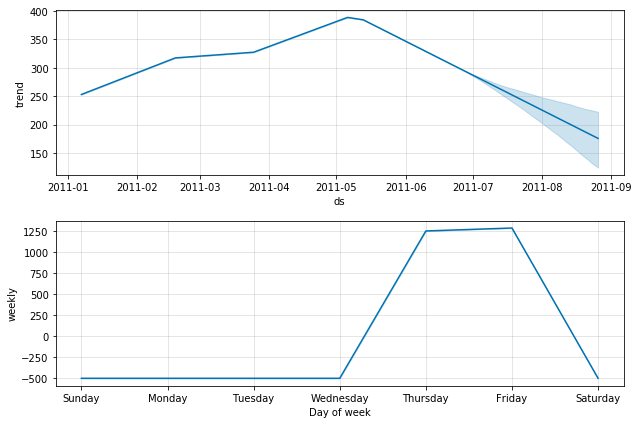

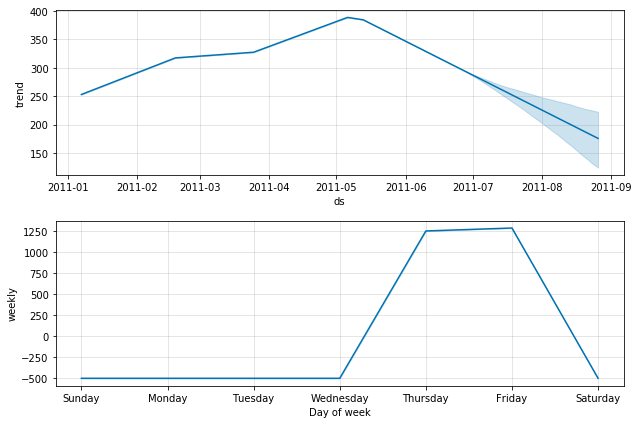

In [108]:
m.plot_components(forecast)